In [20]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns

import csv
import statsmodels.api as sm

# in your notebook cell
import sys

# path relative to your notebook
sys.path.insert(0, '../src')

# import as usual
#import functions

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [21]:
import matplotlib.pyplot as plt
from seaborn import histplot, scatterplot, heatmap

In [14]:
# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
normal = pd.read_csv('./data/normal_weight_overweight.csv')
normal.shape


(3360, 16)

In [28]:
seed = 42

In [36]:
normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       3360 non-null   object 
 1   PANEL           3360 non-null   object 
 2   PANEL_NUM       3360 non-null   int64  
 3   UNIT            3360 non-null   object 
 4   UNIT_NUM        3360 non-null   int64  
 5   STUB_NAME       3360 non-null   object 
 6   STUB_NAME_NUM   3360 non-null   int64  
 7   STUB_LABEL      3360 non-null   object 
 8   STUB_LABEL_NUM  3360 non-null   float64
 9   YEAR            3360 non-null   object 
 10  YEAR_NUM        3360 non-null   int64  
 11  AGE             3360 non-null   object 
 12  AGE_NUM         3360 non-null   float64
 13  ESTIMATE        2899 non-null   float64
 14  SE              2899 non-null   float64
 15  FLAG            844 non-null    object 
dtypes: float64(4), int64(4), object(8)
memory usage: 420.1+ KB


In [27]:
normal.head(5)

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,SE,FLAG
0,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,1988-1994,1,20 years and over,1.0,41.6,0.8,NaN
1,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,1999-2002,2,20 years and over,1.0,33.0,0.8,NaN
2,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,2001-2004,3,20 years and over,1.0,32.3,0.7,NaN
3,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,2003-2006,4,20 years and over,1.0,31.6,0.8,NaN
4,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,2005-2008,5,20 years and over,1.0,30.8,0.7,NaN


In [32]:
normal.tail()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,SE,FLAG
3355,"Normal weight, overweight, and obesity among a...",Grade 3 obesity (BMI greater than or equal to ...,6,"Percent of population, crude",2,Sex and age,6,Female: 75 years and over,6.26,2007-2010,6,75 years and over,1.6,3.4,0.8,*
3356,"Normal weight, overweight, and obesity among a...",Grade 3 obesity (BMI greater than or equal to ...,6,"Percent of population, crude",2,Sex and age,6,Female: 75 years and over,6.26,2009-2012,7,75 years and over,1.6,4.1,1.1,*
3357,"Normal weight, overweight, and obesity among a...",Grade 3 obesity (BMI greater than or equal to ...,6,"Percent of population, crude",2,Sex and age,6,Female: 75 years and over,6.26,2011-2014,8,75 years and over,1.6,3.3,1.0,*
3358,"Normal weight, overweight, and obesity among a...",Grade 3 obesity (BMI greater than or equal to ...,6,"Percent of population, crude",2,Sex and age,6,Female: 75 years and over,6.26,2013-2016,9,75 years and over,1.6,3.4,0.7,NaN
3359,"Normal weight, overweight, and obesity among a...",Grade 3 obesity (BMI greater than or equal to ...,6,"Percent of population, crude",2,Sex and age,6,Female: 75 years and over,6.26,2015-2018,10,75 years and over,1.6,5.1,1.0,.


In [25]:
normal.describe()

,PANEL_NUM,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR_NUM,AGE_NUM,ESTIMATE,SE
count,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.00000,2899.000000,2899.000000
mean,3.500000,1.607143,4.142857,3.966964,5.500000,1.07500,28.503208,1.258779
std,1.708079,0.488458,1.328846,1.470850,2.872709,0.16396,22.046444,0.569608
min,1.000000,1.000000,1.000000,1.100000,1.000000,1.00000,0.300000,0.200000
25%,2.000000,1.000000,3.000000,3.120750,3.000000,1.00000,10.000000,0.800000
50%,3.500000,2.000000,4.000000,3.241500,5.500000,1.00000,22.700000,1.200000
75%,5.000000,2.000000,5.000000,5.325000,8.000000,1.00000,38.050000,1.600000
max,6.000000,2.000000,6.000000,6.260000,10.000000,1.60000,85.900000,3.500000


In [26]:
normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       3360 non-null   object 
 1   PANEL           3360 non-null   object 
 2   PANEL_NUM       3360 non-null   int64  
 3   UNIT            3360 non-null   object 
 4   UNIT_NUM        3360 non-null   int64  
 5   STUB_NAME       3360 non-null   object 
 6   STUB_NAME_NUM   3360 non-null   int64  
 7   STUB_LABEL      3360 non-null   object 
 8   STUB_LABEL_NUM  3360 non-null   float64
 9   YEAR            3360 non-null   object 
 10  YEAR_NUM        3360 non-null   int64  
 11  AGE             3360 non-null   object 
 12  AGE_NUM         3360 non-null   float64
 13  ESTIMATE        2899 non-null   float64
 14  SE              2899 non-null   float64
 15  FLAG            844 non-null    object 
dtypes: float64(4), int64(4), object(8)
memory usage: 420.1+ KB


In [35]:
normal.describe()

,PANEL_NUM,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR_NUM,AGE_NUM,ESTIMATE,SE
count,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.00000,2899.000000,2899.000000
mean,3.500000,1.607143,4.142857,3.966964,5.500000,1.07500,28.503208,1.258779
std,1.708079,0.488458,1.328846,1.470850,2.872709,0.16396,22.046444,0.569608
min,1.000000,1.000000,1.000000,1.100000,1.000000,1.00000,0.300000,0.200000
25%,2.000000,1.000000,3.000000,3.120750,3.000000,1.00000,10.000000,0.800000
50%,3.500000,2.000000,4.000000,3.241500,5.500000,1.00000,22.700000,1.200000
75%,5.000000,2.000000,5.000000,5.325000,8.000000,1.00000,38.050000,1.600000
max,6.000000,2.000000,6.000000,6.260000,10.000000,1.60000,85.900000,3.500000


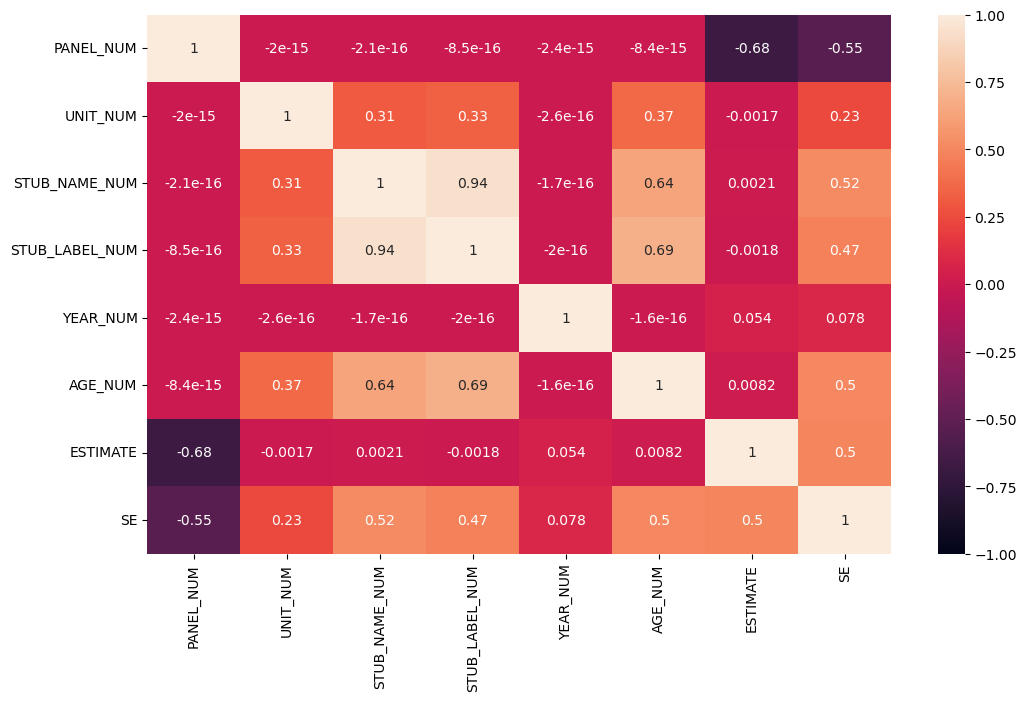

In [31]:
plt.figure(figsize = (12, 7))
sns.heatmap((normal).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

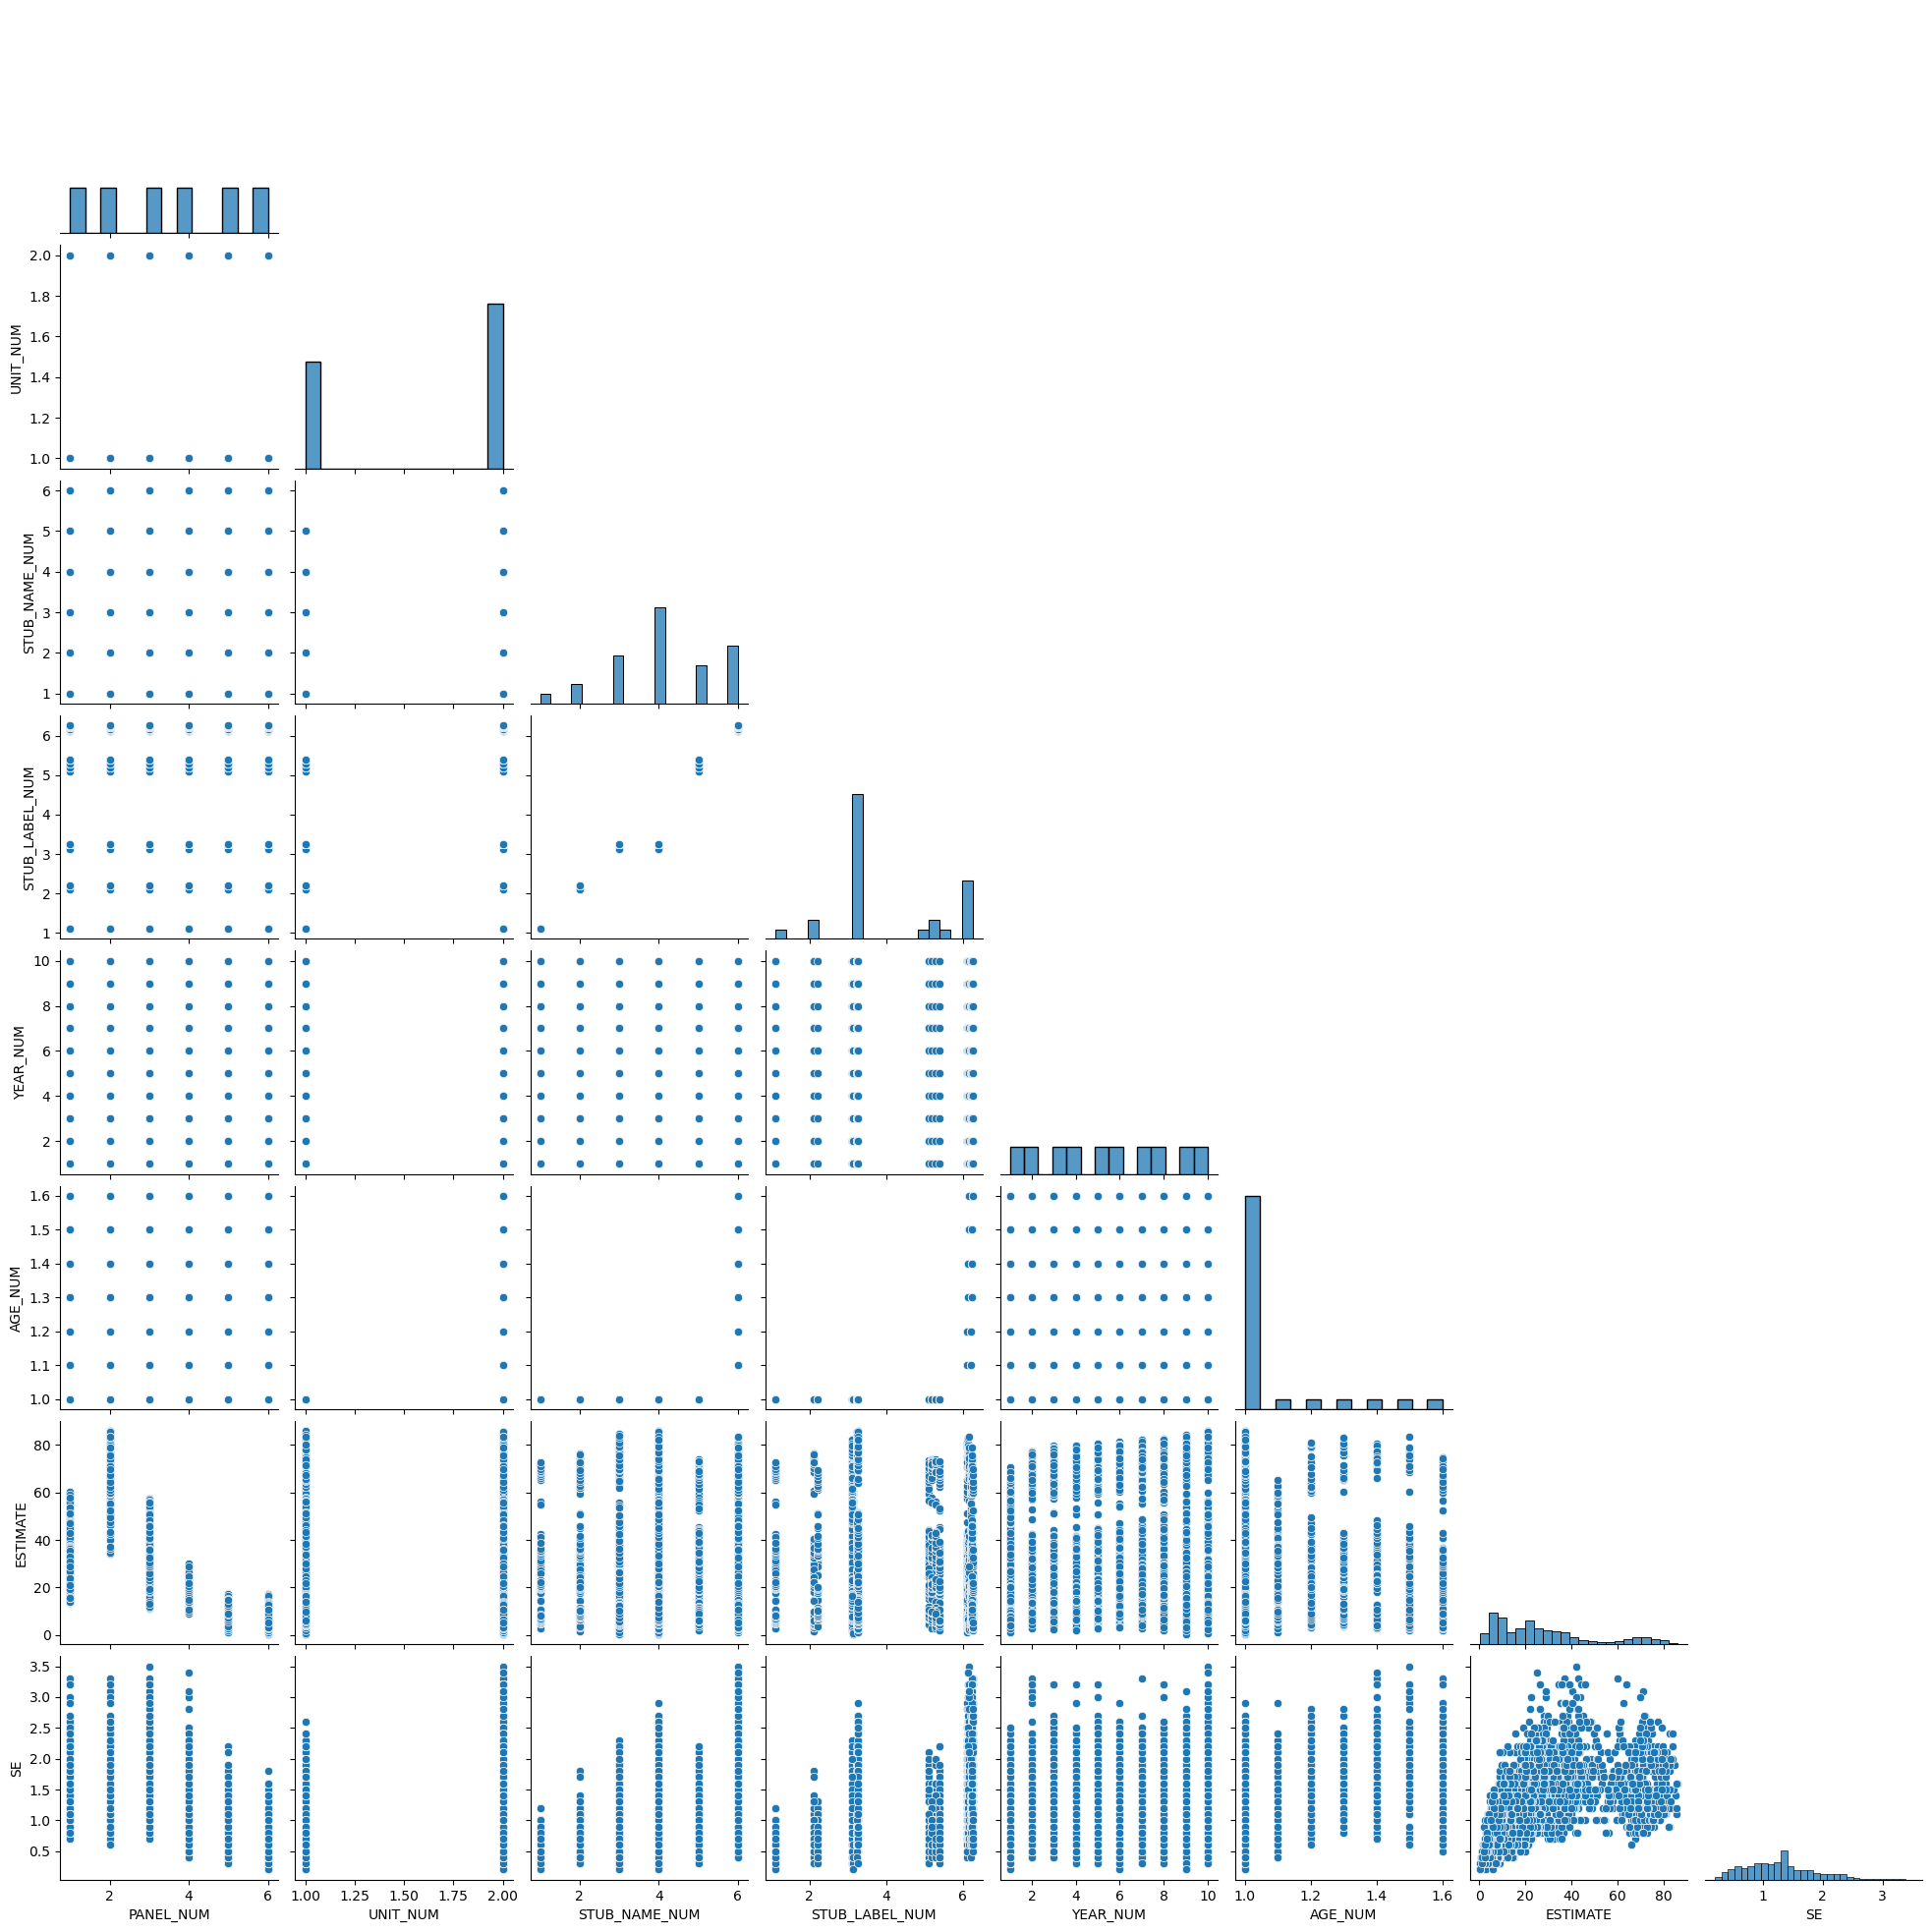

In [37]:
# created a pair plot to identify relationships between variables
sns.pairplot(data=normal, corner=True)